In [0]:
#Description: This program predicts the price of FB stock for a specific day
#             using the Machine Learning algorithm called 
#             Support Vector Regression (SVR) Model

In [0]:
#import the packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [0]:
#Function to make predictions using 3 different support vector regression models with 3 different kernals
def predict_prices(dates, prices, x):
  
  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the models on the dates and prices
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  #return all three model predictions
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

In [31]:
import pandas_datareader as web
stock = 'NATCOPHARM.BO'
stdate = '2019-11-01'
endate = '2020-01-07'
#Get the Stock Quote: The price of a stock as quoted on an exchange
df = web.DataReader(stock, data_source='yahoo', start=stdate, end=endate) #end = '2017-12-31', format = 'YYYY-MM-DD'
#Show the data
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,632.349976,618.299988,620.000000,620.700012,14487.0,620.700012
2020-01-03,620.000000,606.799988,620.000000,608.500000,6003.0,608.500000
2020-01-06,612.000000,594.000000,610.799988,605.549988,3880.0,605.549988
2020-01-07,609.099976,598.299988,609.099976,600.750000,8317.0,600.750000
2020-01-08,614.000000,594.500000,597.450012,599.700012,6943.0,599.700012


In [32]:
df.reset_index(level=0, inplace=True)
#Get the number of rows and columns in the data set
df.shape

(46, 7)

In [0]:
#Create the lists / X and y data set
dates = []
prices = []

In [34]:
#Print the last row of data (this will be the data that we test on)
df.tail(1)

,Date,High,Low,Open,Close,Volume,Adj Close
45,2020-01-08,614.0,594.5,597.450012,599.700012,6943.0,599.700012


In [35]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
print(df.shape)

(45, 7)


In [0]:
df_dates = df.loc[:,'Date'] # Get all of the rows from the Date column
df_open = df.loc[:,'Open'] #Get all of the rows from the Open column

In [37]:
#Create the dependent data set 'y' as prices
for open_price in df_open:
  prices.append(float(open_price))
  #Create the independent data set 'X' as dates
from datetime import datetime
for date in df_dates:
  dates.append( [date.day] )
  #See what days were recoreded in teh data set
print(dates)

[[1], [5], [6], [7], [8], [11], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [28], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30], [31], [1], [2], [3], [6], [7]]


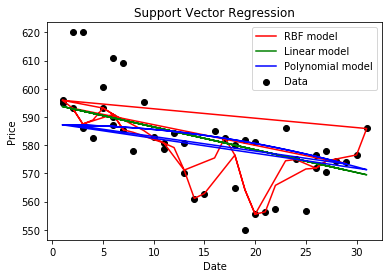

(585.2086359037947, 587.2562393188557, 585.8957468129922)


In [38]:
#Predict the price of FB on day 31
predicted_price = predict_prices(dates, prices, [[9]])
print(predicted_price)